In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
df=data.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df['Geography'])
le.fit_transform(df['Gender'])

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [28]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [6]:
x=df.drop(['RowNumber', 'CustomerId', 'Surname','Exited'], axis=1)
y=df['Exited']

<Axes: xlabel='Exited', ylabel='count'>

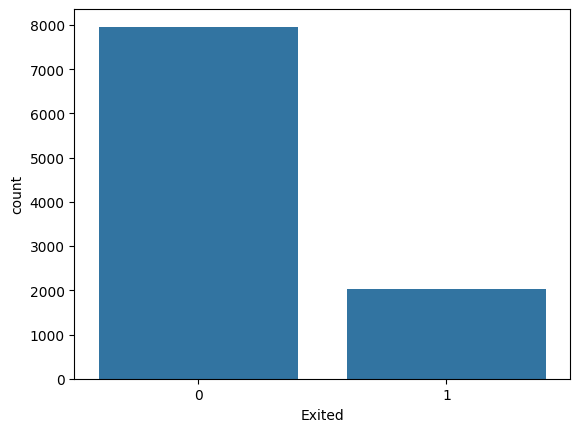

In [7]:
import seaborn as sns
sns.countplot(x=y)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,random_state=42, test_size=0.2)

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
ann= MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                   random_state=42,
                   max_iter=100,
                   activation='relu'
                  )

In [12]:
ann.fit(x_train, y_train)

C:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=42)

In [13]:
y_pred = ann.predict(x_test)

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

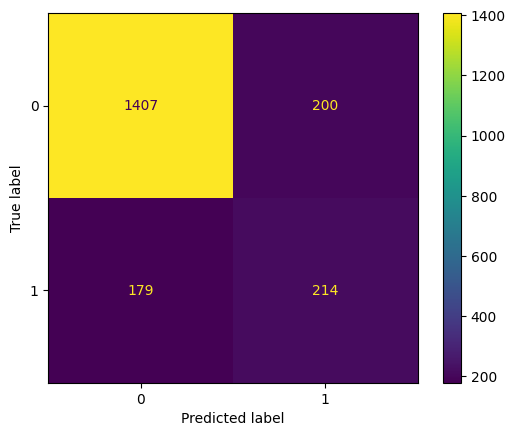

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1607
           1       0.52      0.54      0.53       393

    accuracy                           0.81      2000
   macro avg       0.70      0.71      0.71      2000
weighted avg       0.81      0.81      0.81      2000



In [17]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
x_res,y_res=ros.fit_resample(x,y)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_res)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_res,random_state=42, test_size=0.2)

In [20]:
from sklearn.neural_network import MLPClassifier
ann= MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                   random_state=42,
                   max_iter=100,
                   activation='relu'
                  )
ann.fit(x_train, y_train)

C:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=42)

In [21]:
y_pred = ann.predict(x_test)

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

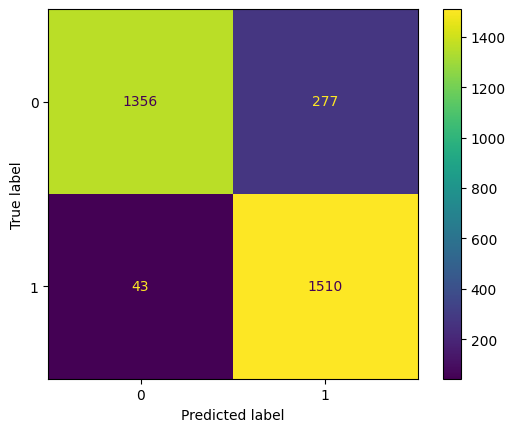

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1633
           1       0.84      0.97      0.90      1553

    accuracy                           0.90      3186
   macro avg       0.91      0.90      0.90      3186
weighted avg       0.91      0.90      0.90      3186

